# <span style="color:blue">Cleaning & preprocessing (2019_May)</span>

In [1]:
yyyy_MMM = '2019_May'

### Load packages

In [2]:
import contractions, csv, emoji, os, re, string, time, unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from wordcloud import WordCloud
from wordsegment import load, segment
load()
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print('package --> pandas --> version --> ' + pd.__version__)
print('package --> re     --> version --> ' + re.__version__)
print('package --> ntlk   --> version --> ' + nltk.__version__)

package --> pandas --> version --> 1.1.3
package --> re     --> version --> 2.2.1
package --> ntlk   --> version --> 3.5


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\minio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Constants

In [3]:
# for reproducible results
random_state = 33
# if debug is True, messages during the process are generated
debug = True
# if the test is True, the process runs on a smaller subset of raw data (json files)
test = False
# id of the step during cleaning/preprocessing
step_num = 0
# path with the documents to preprocess
if test:
    path_doc = r'D:\master\data science\semestre 4\M2.979 - tfm\data\bins_test\doc'
else:
    path_doc = r'D:\master\data science\semestre 4\M2.979 - tfm\data\bins\doc'

# path + file for list stopwords extend
file_list_stopwords_extend = r'D:\master\data science\semestre 4\M2.979 - tfm\data\list_stopwords_extend.csv'
# path + file for list stopwords extend (for instagram)
file_list_stopwords_extend_instagram = r'D:\master\data science\semestre 4\M2.979 - tfm\data\list_stopwords_extend_instagram.csv'
    
file_doc = os.path.join(path_doc, yyyy_MMM, yyyy_MMM)
print('file to clean & preprocess - ', file_doc  + '.csv')

file to clean & preprocess -  D:\master\data science\semestre 4\M2.979 - tfm\data\bins\doc\2019_May\2019_May.csv


# Load data

In [4]:
step_name = 'load_data'

In [5]:
time_start = time.time()

# read/load data
df = pd.read_csv(file_doc + '.csv', names=['id_doc', 'content'])
# we duplicate the 'content' field. Data cleaning/preprocessing will be done over the new duplicated field, 'content_preprocessed'
df['content_preprocessed'] = df['content']

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))

time elapsed 00:00:02.24
0    Soy una perra astuta y si lograr lo que usted ...
1    #MilanaMostovaya 💕💕 pinkoofficial 💕💕 #pinko #p...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
Name: content, dtype: object


# Data cleaning

### Remove rows with blank/null content field

In [6]:
df['content_preprocessed'].replace('', np.nan, inplace=True)
print('Null values before - ', df['content_preprocessed'].isnull().sum())
df = df[df['content_preprocessed'].notnull()]
print('Null values after - ', df['content_preprocessed'].isnull().sum())

Null values before -  4003
Null values after -  0


### Remove values 'content' duplicated

In [7]:
print('Num rows before - ', str(len(df)))
df.drop_duplicates(subset ='content', keep=False, inplace=True) 
print('Num rows after - ', str(len(df)))

Num rows before -  263517
Num rows after -  254211


### Lowercase

In [8]:
step_name = 'to_lowercase'
step_num += 1
step_num

1

In [9]:
time_start = time.time()

df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: str(x).lower())
if debug:
    df['content_to_lowercase'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:09.36
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Remove extra whitespaces

In [10]:
step_name = 'remove_extra_whitespaces_1'
step_num += 1
step_num

2

In [11]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r' +'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_extra_whitespaces_1'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:17.67
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace websites by whitespaces  
https://emailregex.com/

In [12]:
step_name = 'remove_websites'
step_num += 1
step_num

3

In [13]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'((http[s]?://)|(www))(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', str(x)))
if debug:
    df['content_remove_websites'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:21.66
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace emails by whitespaces

In [14]:
step_name = 'remove_emails'
step_num += 1
step_num

4

In [15]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_emails'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:20.95
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace most common  meaningless hashtags by whitespaces  
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

In [16]:
step_name = 'remove_meaningless_hashtags'
step_num += 1
step_num

5

In [17]:
time_start = time.time()

# read meaningless hastags
hashtags = csv.reader(open(r'D:\master\data science\semestre 4\M2.979 - tfm\data\list_meaningless_hashtags.csv'))
# generate regular expression pattern with all the meaningless hashtags to be removed
i = 0
regex = "r'"
for hashtag in hashtags:
    if i>0:
        regex = regex + '|(' + hashtag[0] + ')'
    else:
        regex = regex + '(' + hashtag[0] + ')'
    i += 1
regex = regex + "'"

re_pattern = regex
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_meaningless_hashtags'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:05:20.99
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace hashtag symbol (#) by whitespaces  
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

In [18]:
step_name = 'remove_hashtag_symbol'
step_num += 1
step_num

6

In [19]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'(#)'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_hashtag_symbol'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:23.88
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace mentions (@) by whitespaces

In [20]:
step_name = 'remove_mentions'
step_num += 1
step_num

7

In [21]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'(@\w+)'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_mentions'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:25.59
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace emojis by whitespaces

In [22]:
step_name = 'remove_colons'
step_num += 1
step_num

8

In [23]:
time_start = time.time()

# generate regular expression pattern for removing colon punctuation (:)
re_pattern = r'(:)'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', str(x)))
if debug:
    df['content_remove_colons'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:28.91
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. 💕...
3    throwing it back on a thursday hehe 💮💮💮 pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


In [24]:
step_name = 'replace_emojis'
step_num += 1
step_num

9

In [25]:
time_start = time.time()

# replace emoji by its short name between ':' --> e.g. --> :face_blowing_a_kiss:
df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: emoji.demojize(x))
if debug:
    df['content_replace_emojis'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:11:30.36
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion. :...
3    throwing it back on a thursday hehe :white_flo...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


In [26]:
step_name = 'remove_emojis'
step_num += 1
step_num

10

In [27]:
time_start = time.time()

# generate regular expression pattern for removing emoji's short name between ':'
re_pattern = r'\:(.*?)\:'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_emojis'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:33.59
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it’s compassion.  ...
3    throwing it back on a thursday hehe     pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what’s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace numbers by whitespaces

In [28]:
step_name = 'remove_numbers'
step_num += 1
step_num

11

In [29]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_numbers'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:38.24
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it s compassion.  ...
3    throwing it back on a thursday hehe     pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number ?
Name: content_preprocessed, dtype: object


### Remove accented characters  
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

In [30]:
step_name = 'remove_accents'
step_num += 1
step_num

12

In [31]:
# function to remove accented characters
def remove_accented_chars(text):
   new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
   return new_text

time_start = time.time()

# call function to remove accented characters (remove_accented_chars)
df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: remove_accented_chars(x))
if debug:
    df['content_remove_accents'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:37.95
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it s compassion.  ...
3    throwing it back on a thursday hehe     pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace special characters by whitespaces

In [32]:
step_name = 'remove_special_characters'
step_num += 1
step_num

13

In [33]:
time_start = time.time()

# pattern to keep
re_pattern = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_special_characters'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:41.09
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it s compassion.  ...
3    throwing it back on a thursday hehe     pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number ?
Name: content_preprocessed, dtype: object


### Expand contractions

In [34]:
step_name = 'expand_contractions'
step_num += 1
step_num

14

In [35]:
time_start = time.time()

df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: contractions.fix(x))
if debug:
    df['content_expand_contractions'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:50.02
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it s compassion.  ...
3    throwing it back on a thursday hehe     pretty...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number ?
Name: content_preprocessed, dtype: object


### Remove extra whitespaces

In [36]:
step_name = 'remove_extra_whitespaces_2'
step_num += 1
step_num

15

In [37]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r' +'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_extra_whitespaces_2'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:50.65
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise, it s compassion. p...
3    throwing it back on a thursday hehe prettylitt...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number ?
Name: content_preprocessed, dtype: object


### Replace punctuation by whitespaces

In [38]:
step_name = 'remove_punctuation'
step_num += 1
step_num

16

In [39]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'[^\w\s]'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_punctuation'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:49.07
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0    soy una perra astuta y si lograr lo que usted ...
2    kindness is not compromise  it s compassion  p...
3    throwing it back on a thursday hehe prettylitt...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                        what s your favorite number  
Name: content_preprocessed, dtype: object


### Remove words of up to 3 characters

In [40]:
step_name = 'remove_3_characters'
step_num += 1
step_num

17

In [41]:
time_start = time.time()

# pattern to keep
re_pattern = r'\b\w{1,3}\b'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, '', x))
if debug:
    df['content_remove_3_characters_1'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:54.13
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0      perra astuta   lograr   usted   logrado  hac...
2    kindness   compromise    compassion  proverbs ...
3    throwing  back   thursday hehe prettylittlethi...
4    happy happy birthday aishwaryaraibachchan_arb ...
5                         what  your favorite number  
Name: content_preprocessed, dtype: object


### Replace underscore ( _ ) by whitespaces  
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

In [42]:
step_name = 'remove_underscore'
step_num += 1
step_num

18

In [43]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r'(_)'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_underscore'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:50.81
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0      perra astuta   lograr   usted   logrado  hac...
2    kindness   compromise    compassion  proverbs ...
3    throwing  back   thursday hehe prettylittlethi...
4    happy happy birthday aishwaryaraibachchan arb ...
5                         what  your favorite number  
Name: content_preprocessed, dtype: object


### Remove extra whitespaces

In [44]:
step_name = 'remove_extra_whitespaces_3'
step_num += 1
step_num

19

In [45]:
time_start = time.time()

# generate regular expression pattern
re_pattern = r' +'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, ' ', x))
if debug:
    df['content_remove_extra_whitespaces_3'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:55.17
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0     perra astuta lograr usted logrado hace puta g...
2    kindness compromise compassion proverbs remind...
3    throwing back thursday hehe prettylittlething ...
4    happy happy birthday aishwaryaraibachchan arb ...
5                           what your favorite number 
Name: content_preprocessed, dtype: object


### Detect language  
https://medium.com/1001-nights-in-data-science/three-methods-of-detecting-language-of-textual-data-2c7cc41033b1

In [46]:
step_name = 'detect_language'
step_num += 1
step_num

20

In [47]:
# function to detect language
def detect_language(text):
    try:
        language_detected = detect(text)
    except:
        language_detected = ''
    return language_detected

time_start = time.time()

# call function to detect language (detect_language)
df['language'] = df['content_preprocessed'].map(lambda x: detect_language(x))
if debug:
    df['content_detect_language'] = df['language']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 01:06:10.13
0    Soy una perra astuta y si lograr lo que usted ...
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
4    Happy Happy Birthday aishwaryaraibachchan_arb ...
5                        What’s your Favorite number ?
Name: content, dtype: object
0     perra astuta lograr usted logrado hace puta g...
2    kindness compromise compassion proverbs remind...
3    throwing back thursday hehe prettylittlething ...
4    happy happy birthday aishwaryaraibachchan arb ...
5                           what your favorite number 
Name: content_preprocessed, dtype: object


### Select language (english)

In [48]:
step_name = 'select_english'
step_num += 1
step_num

21

In [49]:
time_start = time.time()

df = df[df['language'] == 'en']
# remove 'language' column
df.drop(['language'], inplace=True, axis=1)
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:32.24
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    kindness compromise compassion proverbs remind...
3    throwing back thursday hehe prettylittlething ...
5                           what your favorite number 
7    learned stick tongue think face might permanen...
9                      lashes shopsofiebella bora bora
Name: content_preprocessed, dtype: object


### Wordsegmentation  
https://medium.com/analytics-vidhya/working-with-twitter-data-b0aa5419532

In [50]:
step_name = 'wordsegmentation'
step_num += 1
step_num

22

In [51]:
# function to perform word segmentation
def get_word_segment(text):
    text = ' '.join(segment(text))
    return text

# function to adapt the results obtained after executing word segmentation
# word segmentation returns a list of lists
def adapt_list(list_of_lists):
    result = [item for elem in list_of_lists for item in elem]
    return result

time_start = time.time()

# call function
df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: get_word_segment(x))
#df['content'] = df['content'].map(lambda x: adapt_list(x))
if debug:
    df['content_wordsegmentation'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 19:27:52.47
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    kindness compromise compassion proverbs remind...
3    throwing back thursday hehe pretty little thin...
5                            what your favorite number
7    learned stick tongue think face might permanen...
9                    lashes shop sofie bella bora bora
Name: content_preprocessed, dtype: object


### Remove words of up to 3 characters

In [52]:
step_name = 'remove_3_characters'
step_num += 1
step_num

23

In [53]:
time_start = time.time()

# pattern to keep
re_pattern = r'\b\w{1,3}\b'
df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: re.sub(re_pattern, '', x))
if debug:
    df['content_remove_3_characters_2'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:27.45
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    kindness compromise compassion proverbs remind...
3    throwing back thursday hehe pretty little thin...
5                            what your favorite number
7    learned stick tongue think face might permanen...
9                    lashes shop sofie bella bora bora
Name: content_preprocessed, dtype: object


# Data preprocessing

### Tokenization

In [54]:
step_name = 'tokenization'
step_num += 1
step_num

24

In [55]:
time_start = time.time()

df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: word_tokenize(x))
if debug:
    df['content_tokenization'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:01:03.45
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    [kindness, compromise, compassion, proverbs, r...
3    [throwing, back, thursday, hehe, pretty, littl...
5                       [what, your, favorite, number]
7    [learned, stick, tongue, think, face, might, p...
9             [lashes, shop, sofie, bella, bora, bora]
Name: content_preprocessed, dtype: object


### Lemmatization  
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0

In [56]:
step_name = 'lemmatization'
step_num += 1
step_num

25

In [57]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# function to perform lemmatization
def get_lem(text):
    result = [WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word)) for word in text]
    return result

time_start = time.time()

# call function
df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: get_lem(x))
if debug:
    df['content_lemmatization'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:54:51.55
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    [kindness, compromise, compassion, proverb, re...
3    [throw, back, thursday, hehe, pretty, little, ...
5                       [what, your, favorite, number]
7    [learn, stick, tongue, think, face, might, per...
9               [lash, shop, sofie, bella, bora, bora]
Name: content_preprocessed, dtype: object


### Wordcloud with top 50 words (before stopwords)

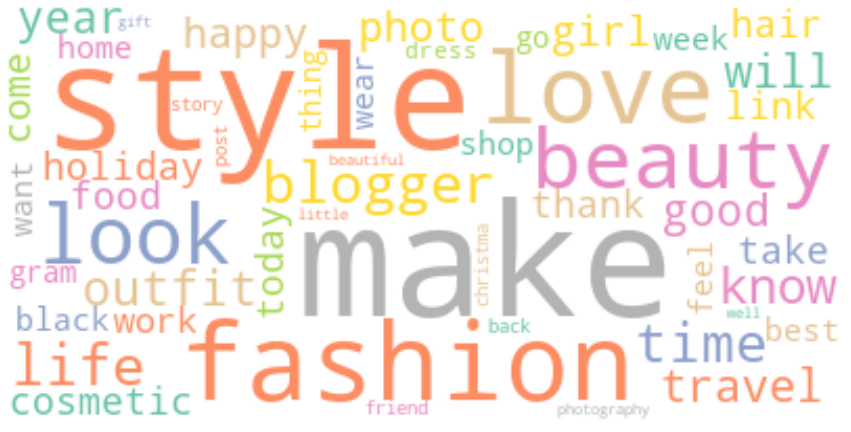

In [58]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
list_words = ' '.join([text for text in list_words])

# create a wordcloud object
wordcloud = WordCloud(background_color='white'
                      ,colormap='Set2'
                      ,collocations=False
                      ,max_words=50
                     )
# generate a wordcloud
wordcloud.generate(list_words)
# visualize the wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

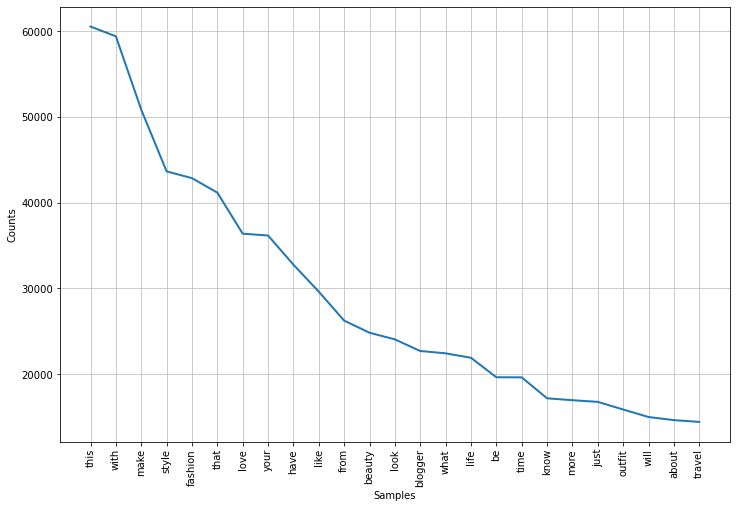

In [59]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
freq_dist = FreqDist(list_words)

fig, ax = plt.subplots(figsize=(12, 8))
freq_dist.plot(25, cumulative=False)
plt.show()

### Remove stopwords  
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e  
https://www.ranks.nl/stopwords

In [60]:
step_name = 'stopwords'
step_num += 1
step_num

26

In [61]:
time_start = time.time()

stop_words = stopwords.words('english')

# read stopwords to add to the default list
df_stopwords_extend = pd.read_csv(file_list_stopwords_extend, names=['word'])
# dataframe to list
stopwords_extend = df_stopwords_extend['word'].values.tolist()
# extend stopwords
stop_words.extend(stopwords_extend)
# remove duplicate elements in the list
stop_words = list(dict.fromkeys(stop_words))

df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: [item for item in x if item not in stop_words])
if debug:
    df['content_stopwords'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:01:06.67
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    [kindness, compromise, compassion, proverb, re...
3    [throw, thursday, hehe, pretty, thing, gift, b...
5                                   [favorite, number]
7     [learn, stick, tongue, face, permanently, stuck]
9               [lash, shop, sofie, bella, bora, bora]
Name: content_preprocessed, dtype: object


### Wordcloud with top 50 words (after stopwords)

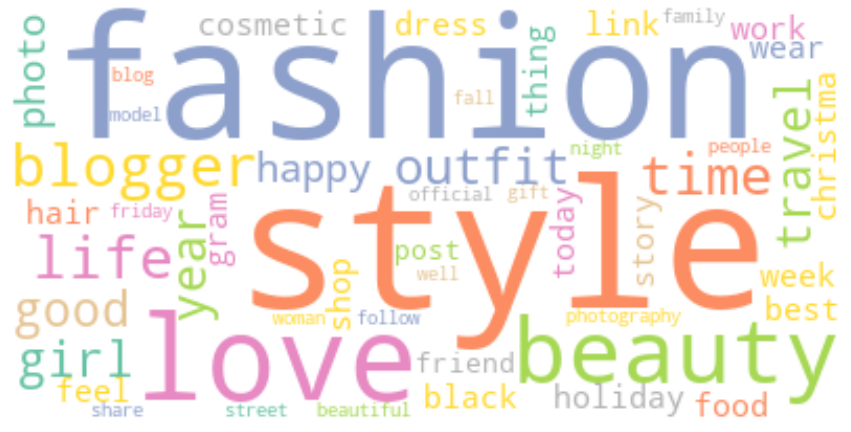

In [62]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
list_words = ' '.join([text for text in list_words])

# create a wordcloud object
wordcloud = WordCloud(background_color='white'
                      ,colormap='Set2'
                      ,collocations=False
                      ,max_words=50
                     )
# generate a wordcloud
wordcloud.generate(list_words)
# visualize the wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

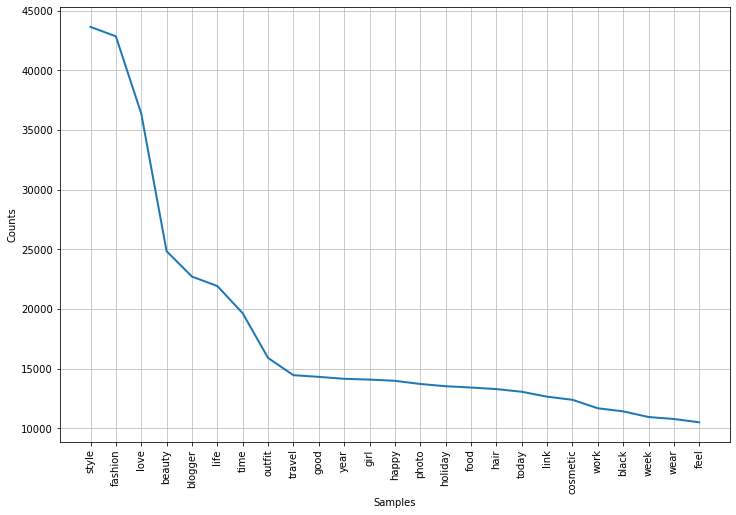

In [63]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
freq_dist = FreqDist(list_words)

fig, ax = plt.subplots(figsize=(12, 8))
freq_dist.plot(25, cumulative=False)
plt.show()

### Remove stopwords (instragram)  
https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e  
https://www.ranks.nl/stopwords

In [64]:
step_name = 'stopwords_instagram'
step_num += 1
step_num

27

In [65]:
time_start = time.time()

stop_words = stopwords.words('english')

# read stopwords to add to the default list
df_stopwords_extend = pd.read_csv(file_list_stopwords_extend_instagram, names=['word'])
# dataframe to list
stopwords_extend = df_stopwords_extend['word'].values.tolist()
# extend stopwords
stop_words.extend(stopwords_extend)
# remove duplicate elements in the list
stop_words = list(dict.fromkeys(stop_words))

df['content_preprocessed'] = df['content_preprocessed'].apply(lambda x: [item for item in x if item not in stop_words])
if debug:
    df['content_stopwords_instagram'] = df['content_preprocessed']
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

time_end = time.time()
hour, rem = divmod(time_end - time_start, 3600)
minute, second = divmod(rem, 60)
print('time elapsed - {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))

print(df['content'].head(5))
print(df['content_preprocessed'].head(5))

time elapsed - 00:00:40.36
2    Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3    Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                        What’s your Favorite number ?
7    Learned to stick her tongue out and I think he...
9                🦋 Lashes are shopsofiebella Bora Bora
Name: content, dtype: object
2    [kindness, compromise, compassion, proverb, re...
3    [throw, thursday, hehe, pretty, thing, gift, b...
5                                   [favorite, number]
7     [learn, stick, tongue, face, permanently, stuck]
9               [lash, shop, sofie, bella, bora, bora]
Name: content_preprocessed, dtype: object


### Wordcloud with top 50 words (after stopwords instagram)

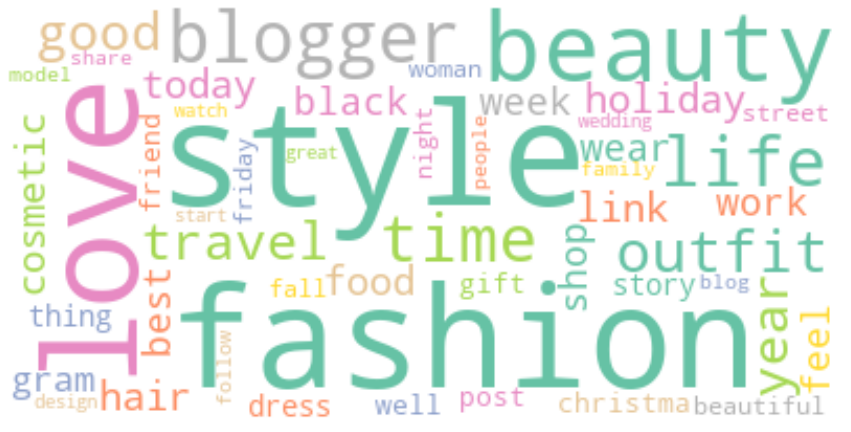

In [66]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
list_words = ' '.join([text for text in list_words])

# create a wordcloud object
wordcloud = WordCloud(background_color='white'
                      ,colormap='Set2'
                      ,collocations=False
                      ,max_words=50
                     )
# generate a wordcloud
wordcloud.generate(list_words)
# visualize the wordcloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

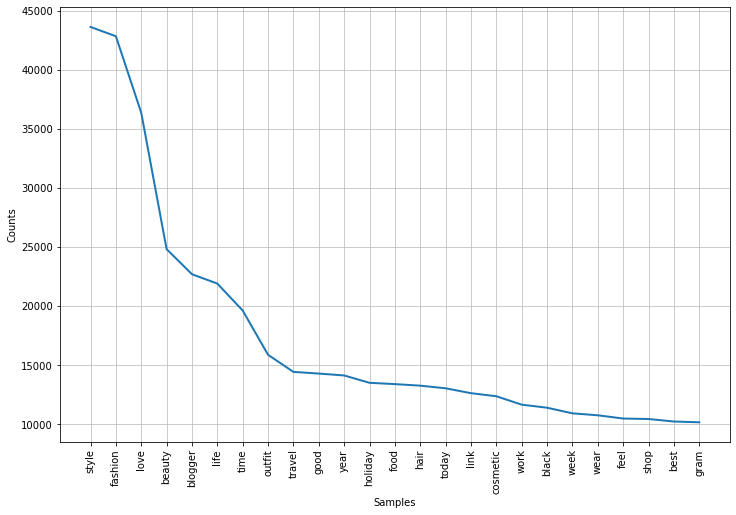

In [67]:
list_words = df.content_preprocessed.tolist()
list_words = adapt_list(list_words)
freq_dist = FreqDist(list_words)

fig, ax = plt.subplots(figsize=(12, 8))
freq_dist.plot(25, cumulative=False)
plt.show()

## Treat spelling errors  
https://medium.com/analytics-vidhya/working-with-twitter-data-b0aa5419532  
https://github.com/fsondej/autocorrect

In [68]:
# step_name = 'spelling_errors'
# step_num += 1
# step_num

In [69]:
# from autocorrect import Speller
# spell = Speller()

# def treat_spelling_errors(text):
#     text = ' '.join([spell(w) for w in text.split()])
#     return text

# time_start = time.time()
# # call function
# df['content_preprocessed'] = df['content_preprocessed'].map(lambda x: treat_spelling_errors(x))
# df.to_csv(file_doc + '_' + str(step).zfill(2) + '_' + step_name + '.csv', index=False, header=True)
# time_end = time.time()
# hour, rem = divmod(time_end - time_start, 3600)
# minute, second = divmod(rem, 60)
# print('time elapsed {:0>2}:{:0>2}:{:05.2f}'.format(int(hour), int(minute), second))
# df['content_preprocessed'].head(10)

## Remove rows with blank/null content_preprocessed field

In [70]:
df['content_preprocessed'].replace('[]', np.nan, inplace=True)
print('Null values before - ', df['content_preprocessed'].isnull().sum())
df = df[df['content_preprocessed'].notnull()]
print('Null values after - ', df['content_preprocessed'].isnull().sum())

Null values before -  0
Null values after -  0


## Save preprocessing results

In [71]:
step_name = 'results'
step_num += 1
step_num

28

In [72]:
if debug:
    df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '_DEBUG.csv', index=False, header=True)
    # remove columns generated to analyze the data cleaning / preprocess steps
    df.drop(['content_to_lowercase'], inplace=True, axis=1)
    df.drop(['content_remove_extra_whitespaces_1'], inplace=True, axis=1)
    df.drop(['content_remove_websites'], inplace=True, axis=1)
    df.drop(['content_remove_emails'], inplace=True, axis=1)
    df.drop(['content_remove_meaningless_hashtags'], inplace=True, axis=1)
    df.drop(['content_remove_hashtag_symbol'], inplace=True, axis=1)
    df.drop(['content_remove_mentions'], inplace=True, axis=1)
    df.drop(['content_remove_colons'], inplace=True, axis=1)
    df.drop(['content_replace_emojis'], inplace=True, axis=1)
    df.drop(['content_remove_emojis'], inplace=True, axis=1)
    df.drop(['content_remove_numbers'], inplace=True, axis=1)
    df.drop(['content_remove_accents'], inplace=True, axis=1)
    df.drop(['content_remove_special_characters'], inplace=True, axis=1)
    df.drop(['content_remove_extra_whitespaces_2'], inplace=True, axis=1)
    df.drop(['content_expand_contractions'], inplace=True, axis=1)
    df.drop(['content_remove_punctuation'], inplace=True, axis=1)
    df.drop(['content_remove_3_characters_1'], inplace=True, axis=1)
    df.drop(['content_remove_underscore'], inplace=True, axis=1)
    df.drop(['content_remove_extra_whitespaces_3'], inplace=True, axis=1)
    df.drop(['content_detect_language'], inplace=True, axis=1)
    df.drop(['content_wordsegmentation'], inplace=True, axis=1)
    df.drop(['content_remove_3_characters_2'], inplace=True, axis=1)
    df.drop(['content_tokenization'], inplace=True, axis=1)
    df.drop(['content_lemmatization'], inplace=True, axis=1)
    df.drop(['content_stopwords'], inplace=True, axis=1)
    df.drop(['content_stopwords_instagram'], inplace=True, axis=1)

# final file --> will be the input to build the model
df.to_csv(file_doc + '_' + str(step_num).zfill(2) + '_' + step_name + '.csv', index=False, header=True)

print(df['content'].head(10))
print(df['content_preprocessed'].head(10))

2     Kindness is NOT COMPROMISE, it’s COMPASSION. 💕...
3     Throwing it back on a Thursday hehe 💮💮💮 pretty...
5                         What’s your Favorite number ?
7     Learned to stick her tongue out and I think he...
9                 🦋 Lashes are shopsofiebella Bora Bora
11    Don’t resist to change. Embrace it changee_age...
12    Available coulors Red,black ,gold,silver,white...
15    ⚡️ FAST REACTIONS from f2footballclub’s very o...
16    I took this pic for you, just in case you miss...
20    #TBT Posted Up w/ quincy Photo #SaileyWilliams...
Name: content, dtype: object
2     [kindness, compromise, compassion, proverb, re...
3     [throw, thursday, hehe, pretty, thing, gift, b...
5                                    [favorite, number]
7      [learn, stick, tongue, face, permanently, stuck]
9                [lash, shop, sofie, bella, bora, bora]
11    [resist, change, embrace, change, agency, wear...
12    [lors, black, gold, silver, white, pink, kindl...
15       [fast, rea

# Remove metadata

In [73]:
if test:
    path_meta = r'D:\master\data science\semestre 4\M2.979 - tfm\data\bins_test\meta'
else:
    path_meta = r'D:\master\data science\semestre 4\M2.979 - tfm\data\bins\meta'

file_meta = os.path.join(path_meta, yyyy_MMM, yyyy_MMM)
print('file to clean & preprocess - ', file_meta  + '.csv')

file to clean & preprocess -  D:\master\data science\semestre 4\M2.979 - tfm\data\bins\meta\2019_May\2019_May.csv


In [74]:
# split meta dataset (first half)
df_meta = pd.read_csv(file_meta + '.csv', names=['id_meta', 'file', 'author_followers', 'author_full_name', 'author_id', 'author_image', 'author_name', 'author_url', 'date', 'date_from_provider', 'id', 'id_from_provider', 'image_url', 'link', 'location_latitude', 'location_longitude', 'place_country_code', 'place_name', 'place_street_address', 'provider', 'social_likes', 'social_replies'])
df_meta_merged = pd.merge(left=df, right=df_meta, left_on='id_doc', right_on='id_meta')
del df_meta_merged['id_doc']
del df_meta_merged['content']
del df_meta_merged['content_preprocessed']
df_meta_merged.to_csv(file_meta + '.csv', index=False, header=False)